In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 111.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

# Lecture 30

In [3]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

## Correlation

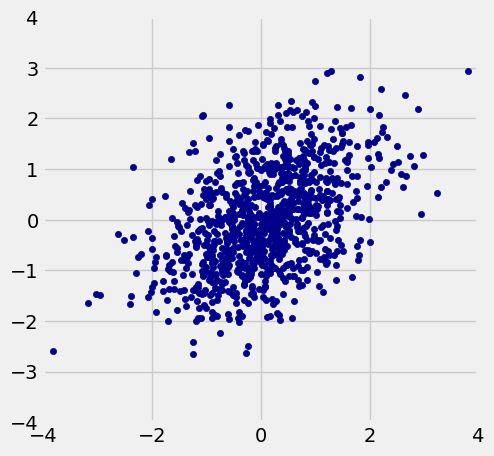

In [6]:
r_scatter(0.5)

In [7]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


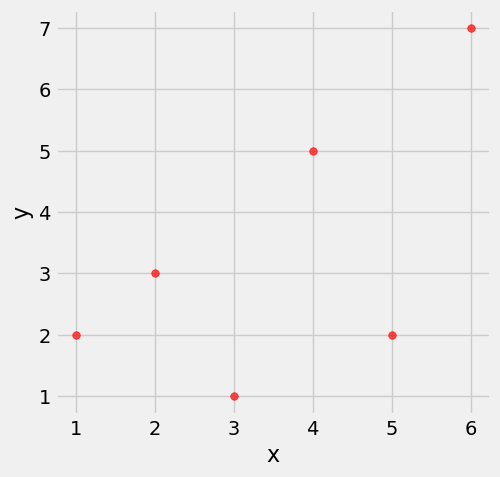

In [8]:
t.scatter('x', 'y', s=30, color='red')

In [9]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


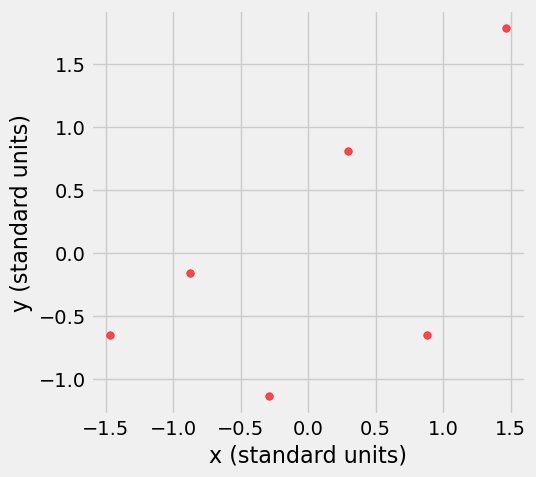

In [10]:
t.scatter(2, 3, s=30, color='red')

In [11]:
t = t.with_columns(
    'product of standard units', t.column(2) * t.column(3))
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [12]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.61741639718977093

In [13]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [14]:
correlation(t, 'x', 'y')

0.61741639718977093

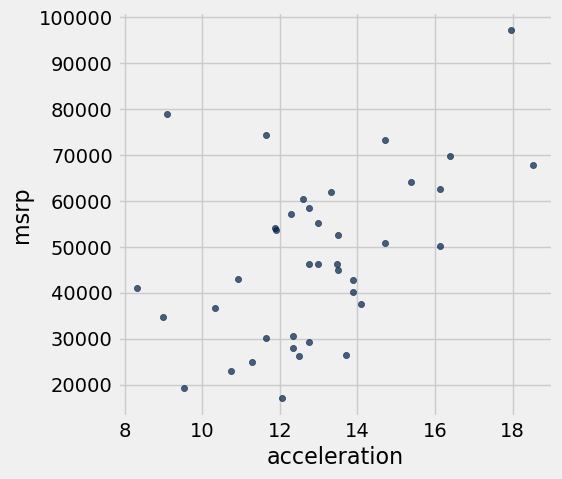

In [15]:
hybrid = Table.read_table('hybrid.csv')
suv = hybrid.where('class', 'SUV')
suv.scatter('acceleration', 'msrp')

In [16]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

### Switching Axes

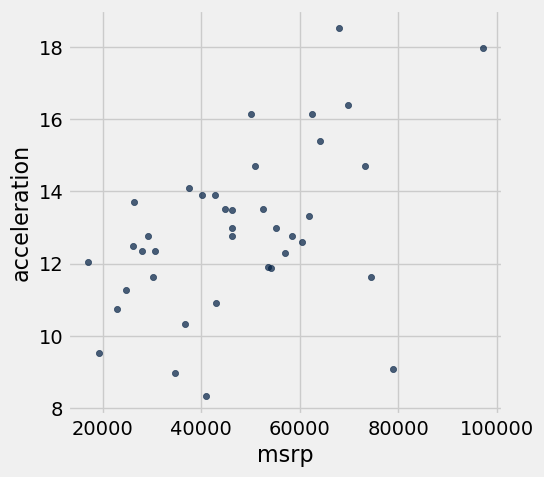

In [22]:
suv.scatter('msrp', 'acceleration')

In [24]:
correlation(suv, 'msrp', 'acceleration')

0.48699799279959155

### Nonlinearity

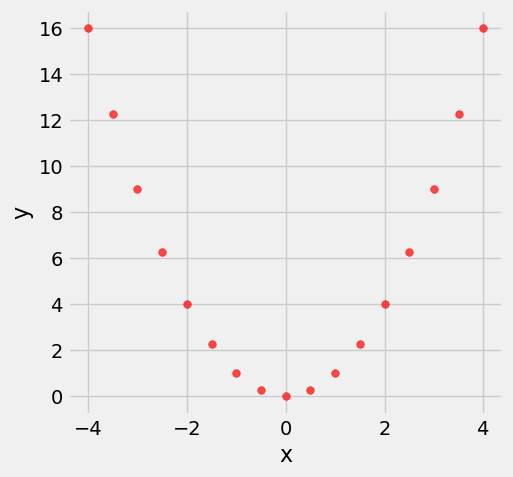

In [25]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [26]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers

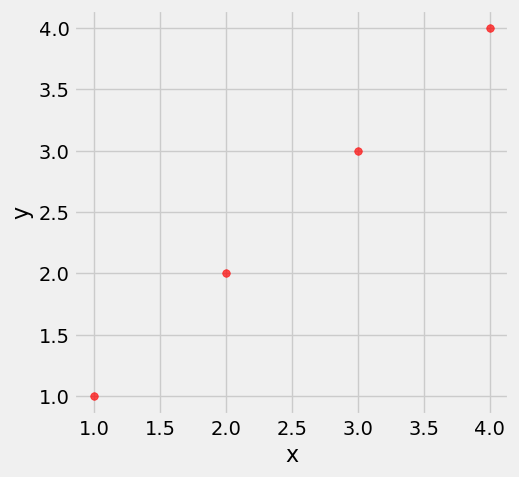

In [27]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [28]:
correlation(line, 'x', 'y')

1.0

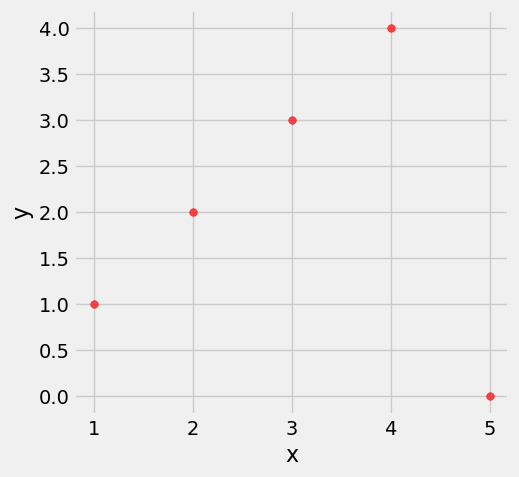

In [29]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [30]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations

In [31]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


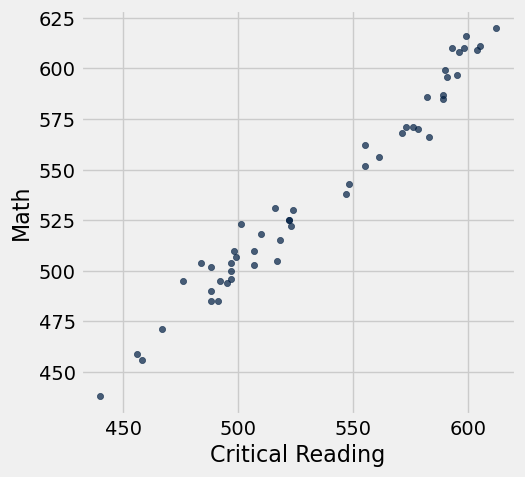

In [32]:
sat2014.scatter('Critical Reading', 'Math')

In [33]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

## Prediction Lines

### r = 0.99

In [39]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


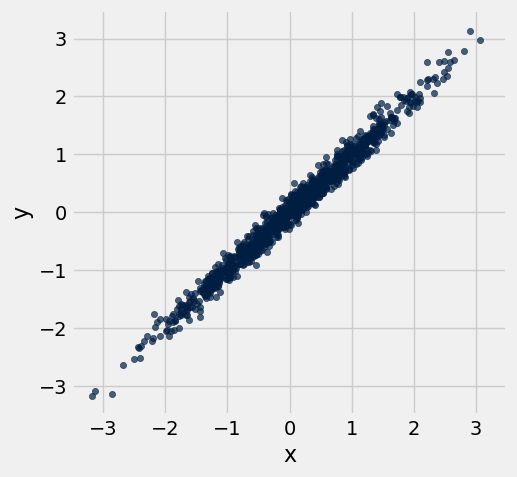

In [40]:
example.scatter('x', 'y')
resize_window()

In [41]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))   

In [42]:
nn_prediction_example(-2.25)

-2.1476337989800527

In [43]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

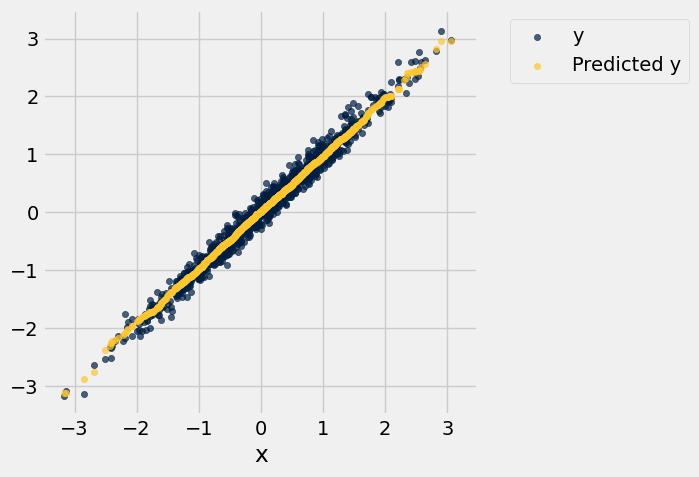

In [44]:
example.scatter('x')
resize_window()

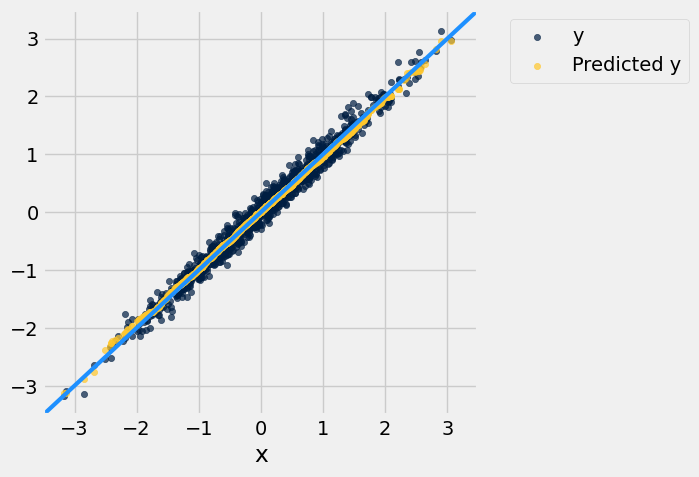

In [45]:
example.scatter('x')
draw_line(slope=1)
resize_window()

### r = 0

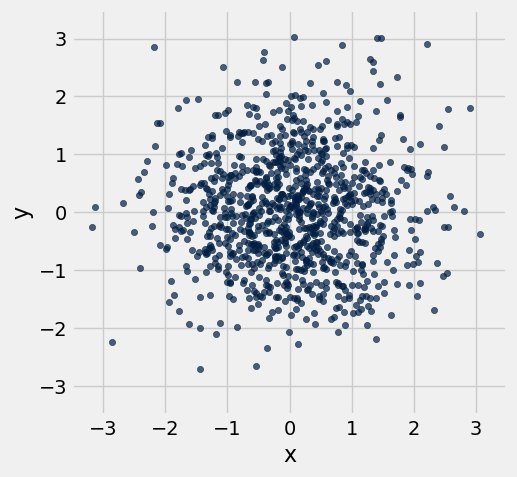

In [46]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [47]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

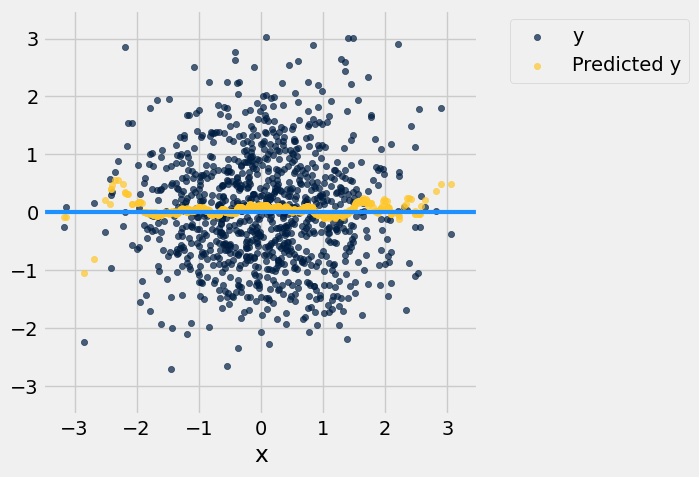

In [48]:
example.scatter('x')
draw_line(slope = 0)
resize_window()

### r = 0.5

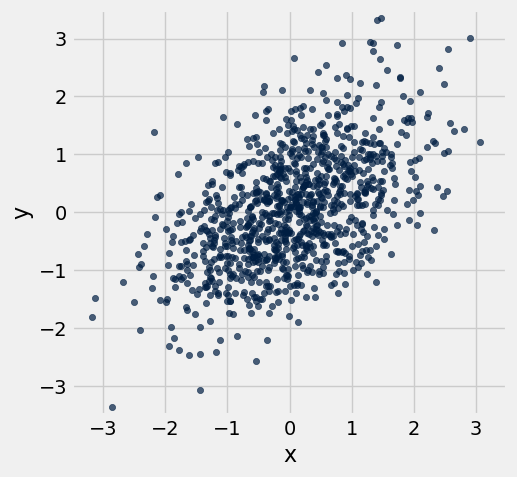

In [49]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

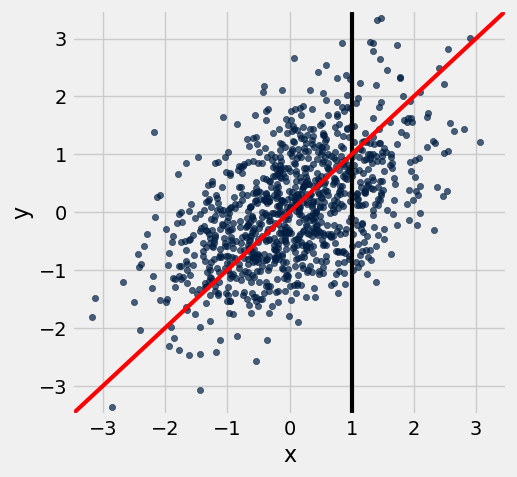

In [53]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1)
draw_line(slope=1, intercept=0, color='red')

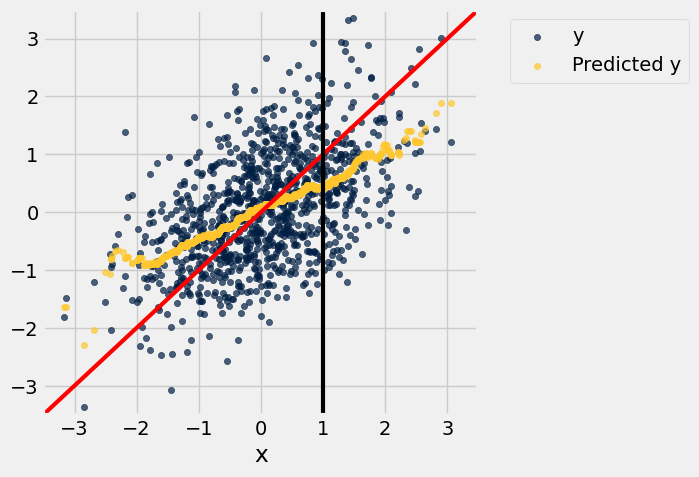

In [54]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, color='red')
draw_vertical_line(1)
resize_window()

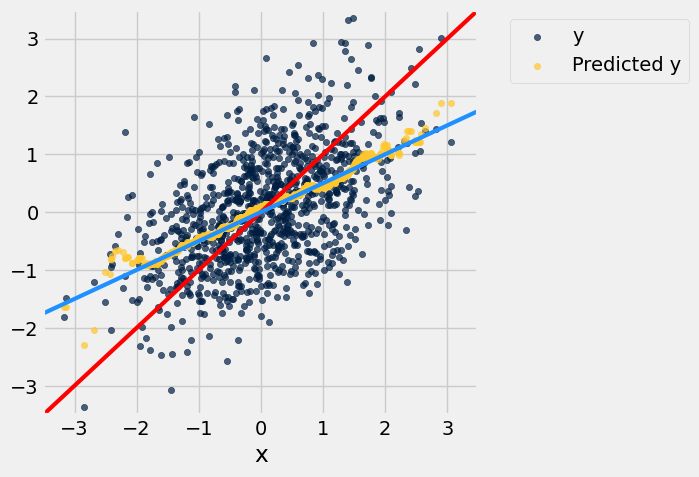

In [52]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0)
resize_window()

###  r = 0.7

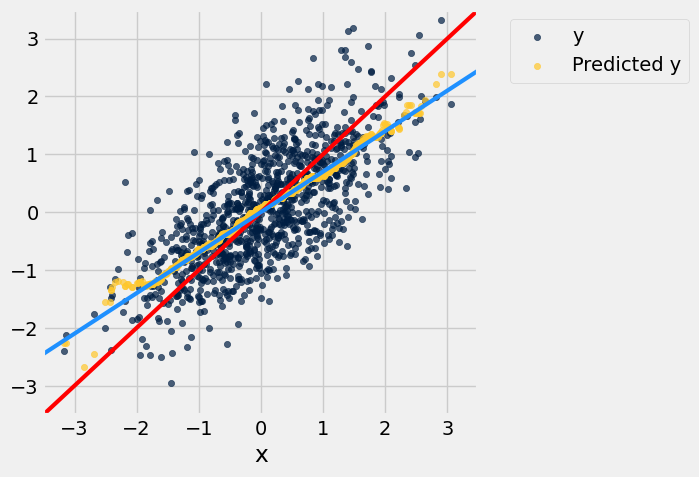

In [55]:
example = r_table(0.7)
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.7, intercept=0, color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [56]:
# Copy-pasted from above
def standard_units(x):
    """ Converts an array x to standard units """
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [57]:
def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd


In [58]:
def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [59]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.50226382816259152

## Heights Data and Regression Line

In [60]:
# Note: Child heights are the **adult** heights of children in a family
families = Table.read_table('family_heights.csv')
parent_avgs = (families.column('father') + families.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights.show(5)

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5


In [61]:
def nn_prediction_height(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child')) 

In [62]:
heights_with_predictions = heights.with_column(
    'Nearest neighbor prediction', 
    heights.apply(nn_prediction_height, 'Parent Average'))
heights_with_predictions.show(5)

Parent Average,Child,Nearest neighbor prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158


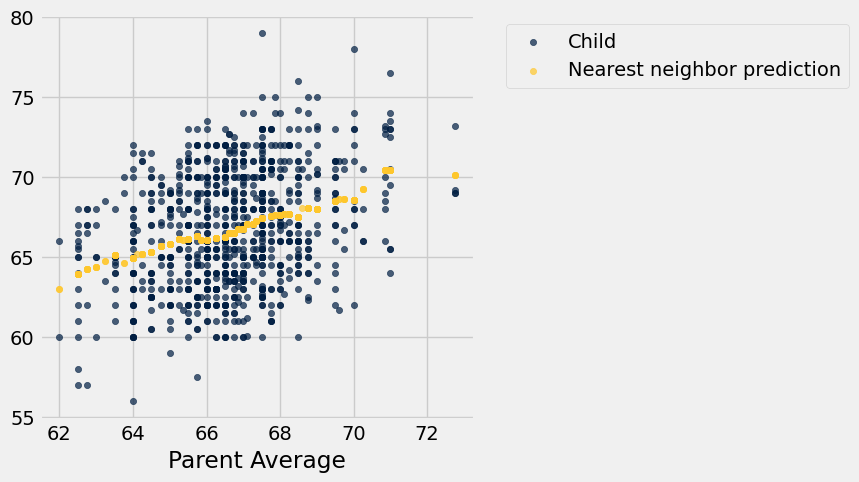

In [63]:
heights_with_predictions.scatter('Parent Average')

In [64]:
predicted_heights_slope = slope(heights, 'Parent Average', 'Child')
predicted_heights_intercept = intercept(heights, 'Parent Average', 'Child')
[predicted_heights_slope, predicted_heights_intercept]

[0.66449526235258838, 22.461839955758798]

In [65]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    predicted_heights_slope*heights.column('Parent Average') + predicted_heights_intercept
)
heights_with_predictions

Parent Average,Child,Nearest neighbor prediction,Regression Prediction
72.75,73.2,70.1,70.8039
72.75,69.2,70.1,70.8039
72.75,69,70.1,70.8039
72.75,69,70.1,70.8039
71,73.5,70.4158,69.641
71,72.5,70.4158,69.641
71,65.5,70.4158,69.641
71,65.5,70.4158,69.641
69.5,71,68.5025,68.6443
69.5,68,68.5025,68.6443


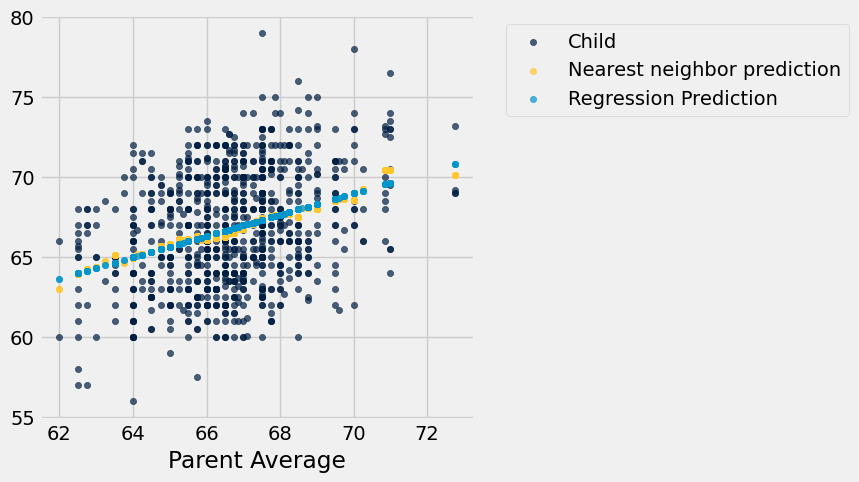

In [66]:
heights_with_predictions.scatter('Parent Average')